In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('results_gpu.csv')
print(df.columns)

Index(['ModelName', 'meanCELoss_tr', 'stdCELoss_tr', 'meanCELoss_te',
       'stdCELoss_te', 'meanAccuracy_tr', 'stdAccuracy_tr', 'meanAccuracy_te',
       'stdAccuracy_te', 'meanTime_tr', 'stdTime_tr'],
      dtype='object')


In [3]:
df['ActivFunc'] = 0
df.loc[range(12),['ActivFunc']] = 'ReLU'
df.loc[range(12,19),['ActivFunc']] = 'Tanh'
df.loc[range(19,len(df)),['ActivFunc']] = 'LeakyReLU'

In [4]:
print(df[['ModelName', 'ActivFunc']])

                             ModelName  ActivFunc
0                       FullyConnected       ReLU
1                   BasicConvolutional       ReLU
2                 BasicConvolutionalBN       ReLU
3              BasicFullyConvolutional       ReLU
4            BasicFullyConvolutionalBN       ReLU
5                DropoutFullyConnected       ReLU
6       DropoutFullyConnectedBatchNorm       ReLU
7                               ResNet       ReLU
8                           SiameseNet       ReLU
9                  SiameseNetAuxiliary       ReLU
10                    SiameseNetResNet       ReLU
11           SiameseNetResNetAuxiliary       ReLU
12                  FullyConnectedtanh       Tanh
13              BasicConvolutionaltanh       Tanh
14            BasicConvolutionalBNtanh       Tanh
15         BasicFullyConvolutionaltanh       Tanh
16       BasicFullyConvolutionalBNtanh       Tanh
17           DropoutFullyConnectedtanh       Tanh
18  DropoutFullyConnectedBatchNormtanh       Tanh


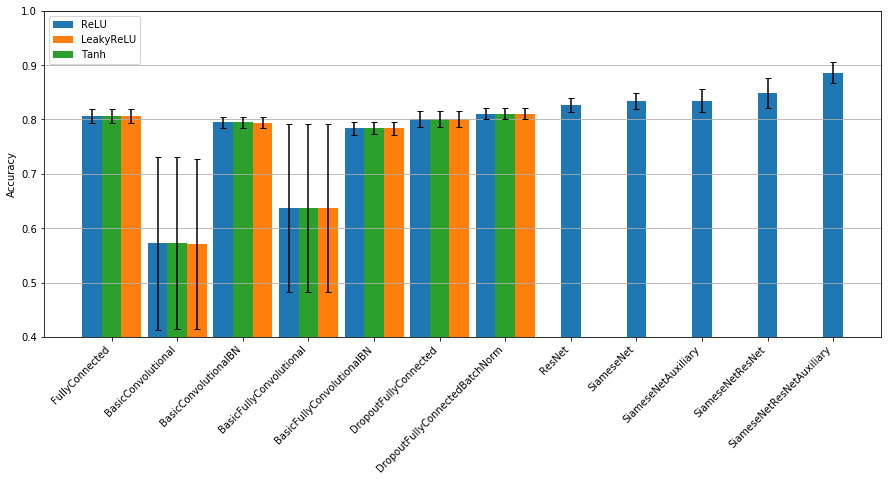

In [22]:
fig = plt.figure(figsize=(15,6))
# plt.title('Model accuracy on test set')
plt.grid(axis='y')

model_names = df.ModelName[:12]

# width of the bars
barWidth = 0.3
 
# Accuracy bars
bars_relu = df.meanAccuracy_te[df['ActivFunc'] == 'ReLU']
bars_tanh = df.meanAccuracy_te[df['ActivFunc'] == 'Tanh']
bars_Lrelu = df.meanAccuracy_te[df['ActivFunc'] == 'LeakyReLU']
 
x_relu = pd.array(range(12), dtype='float')
x_Lrelu = x_relu + 2*barWidth
x_tanh = x_relu + barWidth    

x_relu[-5:] += barWidth

# Height of the error bars
yer_relu = df.stdAccuracy_te[df['ActivFunc'] == 'ReLU']
yer_tanh = df.stdAccuracy_te[df['ActivFunc'] == 'Tanh']
yer_Lrelu = df.stdAccuracy_te[df['ActivFunc'] == 'LeakyReLU']

transparent = (0, 0, 0, 0)
plt.bar(x_relu, bars_relu, width= barWidth, yerr=yer_relu, capsize=3, label='ReLU')
plt.bar(x_Lrelu[:len(bars_Lrelu)], bars_Lrelu, width = barWidth, yerr=yer_Lrelu, capsize=3, label='LeakyReLU')
plt.bar(x_tanh[:len(bars_tanh)], bars_tanh, width = barWidth, yerr=yer_tanh, capsize=3, label='Tanh')

# general layout
plt.ylim(0.4,1)
plt.xticks([r + barWidth for r in range(len(bars_relu))], model_names, rotation=45, ha = 'right')
plt.ylabel('Accuracy')
# left, right = plt.xlim()
# plt.xlim(left, right)
# plt.hlines(CV_per_class_results['Logistic Regression'].mean(), left, right, color='seagreen', linestyles='dashed', label='Best per-class accuracy')
# plt.hlines(CV_results['Logistic Regression'].mean(), left, right, color='steelblue', linestyles='dotted', label='Best overall accuracy')
plt.legend()


plt.savefig('BarPlotResults-gpu.png', bbox_inches='tight', pad_inches=0.2)

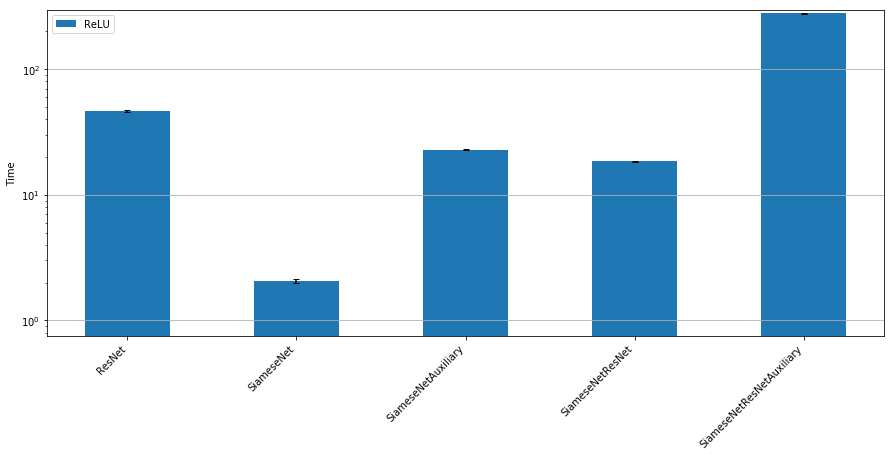

In [23]:
fig = plt.figure(figsize=(15,6))
# plt.title('Training Time (seconds)')
plt.grid(axis='y')

model_names = df.ModelName[:12]

# width of the bars
barWidth = 0.5
 
# Time bars
bars_relu = df.drop(index=range(7))[df.drop(index=range(7))['ActivFunc'] == 'ReLU']['meanTime_tr']
 
x_relu = pd.array(range(len(bars_relu)), dtype='float')

# Height of the error bars
yer_relu = df.drop(index=range(7))[df.drop(index=range(7))['ActivFunc'] == 'ReLU']['stdTime_tr']

transparent = (0, 0, 0, 0)
plt.bar(x_relu, bars_relu, width= barWidth, yerr=yer_relu, capsize=3, label='ReLU')

# general layout
bpttom, top = plt.ylim()
plt.yscale('log')
plt.ylim(0.75,top)
plt.xticks([r for r in range(len(bars_relu))], model_names[7:], rotation=45, ha = 'right')
plt.ylabel('Time')
# plt.xlim(left, right)
# plt.hlines(CV_per_class_results['Logistic Regression'].mean(), left, right, color='seagreen', linestyles='dashed', label='Best per-class accuracy')
# plt.hlines(CV_results['Logistic Regression'].mean(), left, right, color='steelblue', linestyles='dotted', label='Best overall accuracy')
plt.legend()


plt.savefig('BarPlotTime-slow-gpu.png', bbox_inches='tight', pad_inches=0.2)

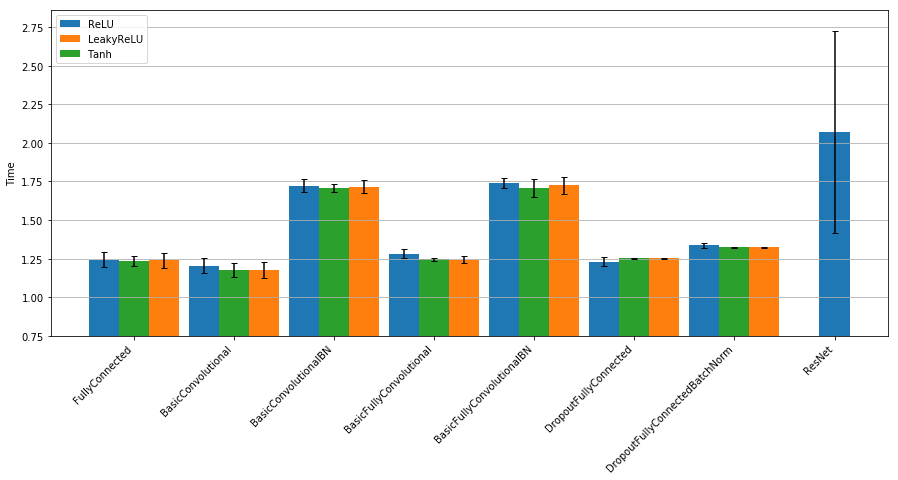

In [24]:
fig = plt.figure(figsize=(15,6))
# plt.title('Training Time (seconds)')
plt.grid(axis='y')

model_names = df.ModelName[:12]

# width of the bars
barWidth = 0.3
 
# Time bars
bars_relu = df.drop(index=[7,9,10,11])[df.drop(index=[7,9,10,11])['ActivFunc'] == 'ReLU']['meanTime_tr']
bars_tanh = df.meanTime_tr[df['ActivFunc'] == 'Tanh']
bars_Lrelu = df.meanTime_tr[df['ActivFunc'] == 'LeakyReLU']
 
x_relu = pd.array(range(12), dtype='float')
x_Lrelu = x_relu + 2*barWidth
x_tanh = x_relu + barWidth    

x_relu[-5:] += barWidth

# Height of the error bars
yer_relu = df.stdTime_tr[df['ActivFunc'] == 'ReLU']
yer_tanh = df.stdTime_tr[df['ActivFunc'] == 'Tanh']
yer_Lrelu = df.stdTime_tr[df['ActivFunc'] == 'LeakyReLU']

transparent = (0, 0, 0, 0)
plt.bar(x_relu[:len(bars_Lrelu)+1], bars_relu[:len(bars_Lrelu)+1], width= barWidth, yerr=yer_relu[:len(bars_Lrelu)+1], capsize=3, label='ReLU')
plt.bar(x_Lrelu[:len(bars_Lrelu)], bars_Lrelu, width = barWidth, yerr=yer_Lrelu, capsize=3, label='LeakyReLU')
plt.bar(x_tanh[:len(bars_tanh)], bars_tanh, width = barWidth, yerr=yer_tanh, capsize=3, label='Tanh')

# general layout
bpttom, top = plt.ylim()
plt.yscale('linear')
plt.ylim(0.75,top)
plt.xticks([r + barWidth for r in range(len(bars_Lrelu)+1)], model_names[:len(bars_Lrelu)+1], rotation=45, ha = 'right')
plt.ylabel('Time')
# plt.xlim(left, right)
# plt.hlines(CV_per_class_results['Logistic Regression'].mean(), left, right, color='seagreen', linestyles='dashed', label='Best per-class accuracy')
# plt.hlines(CV_results['Logistic Regression'].mean(), left, right, color='steelblue', linestyles='dotted', label='Best overall accuracy')
plt.legend()


plt.savefig('BarPlotTime-fast-gpu.png', bbox_inches='tight', pad_inches=0.2)

In [25]:
df2 = pd.read_csv('results_cpu.csv')
print(df2.columns)

Index(['ModelName', 'meanCELoss_tr', 'stdCELoss_tr', 'meanCELoss_te',
       'stdCELoss_te', 'meanAccuracy_tr', 'stdAccuracy_tr', 'meanAccuracy_te',
       'stdAccuracy_tr.1', 'meanTime_tr', 'stdTime_tr'],
      dtype='object')


In [26]:
df2['ActivFunc'] = 0
df2.loc[range(12),['ActivFunc']] = 'ReLU'
df2.loc[range(12,19),['ActivFunc']] = 'Tanh'
df2.loc[range(19,len(df2)),['ActivFunc']] = 'LeakyReLU'

In [27]:
print(df2[['ModelName', 'ActivFunc']])

                                  ModelName  ActivFunc
0                            FullyConnected       ReLU
1                        BasicConvolutional       ReLU
2                      BasicConvolutionalBN       ReLU
3                   BasicFullyConvolutional       ReLU
4                 BasicFullyConvolutionalBN       ReLU
5                     DropoutFullyConnected       ReLU
6            DropoutFullyConnectedBatchNorm       ReLU
7                        FullyConnectedtanh       ReLU
8                    BasicConvolutionaltanh       ReLU
9                  BasicConvolutionalBNtanh       ReLU
10              BasicFullyConvolutionaltanh       ReLU
11            BasicFullyConvolutionalBNtanh       ReLU
12                DropoutFullyConnectedtanh       Tanh
13       DropoutFullyConnectedBatchNormtanh       Tanh
14                  FullyConnectedLeakyRelu       Tanh
15              BasicConvolutionalLeakyRelu       Tanh
16            BasicConvolutionalBNLeakyRelu       Tanh
17        

AttributeError: 'DataFrame' object has no attribute 'stdAccuracy_te'

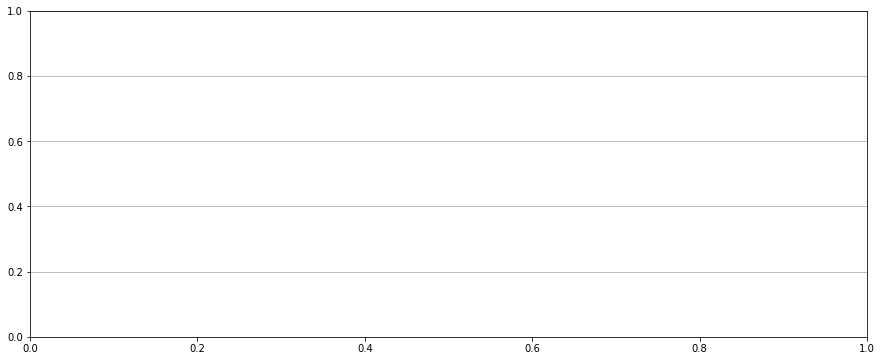

In [28]:
fig = plt.figure(figsize=(15,6))
# plt.title('Model accuracy on test set')
plt.grid(axis='y')

model_names = df2.ModelName[:12]

# width of the bars
barWidth = 0.3
 
# Accuracy bars
bars_relu = df2.meanAccuracy_te[df2['ActivFunc'] == 'ReLU']
bars_tanh = df2.meanAccuracy_te[df2['ActivFunc'] == 'Tanh']
bars_Lrelu = df2.meanAccuracy_te[df2['ActivFunc'] == 'LeakyReLU']
 
x_relu = pd.array(range(12), dtype='float')
x_Lrelu = x_relu + 2*barWidth
x_tanh = x_relu + barWidth    

x_relu[-5:] += barWidth

# Height of the error bars
yer_relu = df2.stdAccuracy_te[df2['ActivFunc'] == 'ReLU']
yer_tanh = df2.stdAccuracy_te[df2['ActivFunc'] == 'Tanh']
yer_Lrelu = df2.stdAccuracy_te[df2['ActivFunc'] == 'LeakyReLU']

transparent = (0, 0, 0, 0)
plt.bar(x_relu, bars_relu, width= barWidth, yerr=yer_relu, capsize=3, label='ReLU')
plt.bar(x_Lrelu[:len(bars_Lrelu)], bars_Lrelu, width = barWidth, yerr=yer_Lrelu, capsize=3, label='LeakyReLU')
plt.bar(x_tanh[:len(bars_tanh)], bars_tanh, width = barWidth, yerr=yer_tanh, capsize=3, label='Tanh')

# general layout
plt.ylim(0.4,1)
plt.xticks([r + barWidth for r in range(len(bars_relu))], model_names, rotation=45, ha = 'right')
plt.ylabel('Accuracy')
# left, right = plt.xlim()
# plt.xlim(left, right)
# plt.hlines(CV_per_class_results['Logistic Regression'].mean(), left, right, color='seagreen', linestyles='dashed', label='Best per-class accuracy')
# plt.hlines(CV_results['Logistic Regression'].mean(), left, right, color='steelblue', linestyles='dotted', label='Best overall accuracy')
plt.legend()


plt.savefig('BarPlotResults-cpu.png', bbox_inches='tight', pad_inches=0.2)

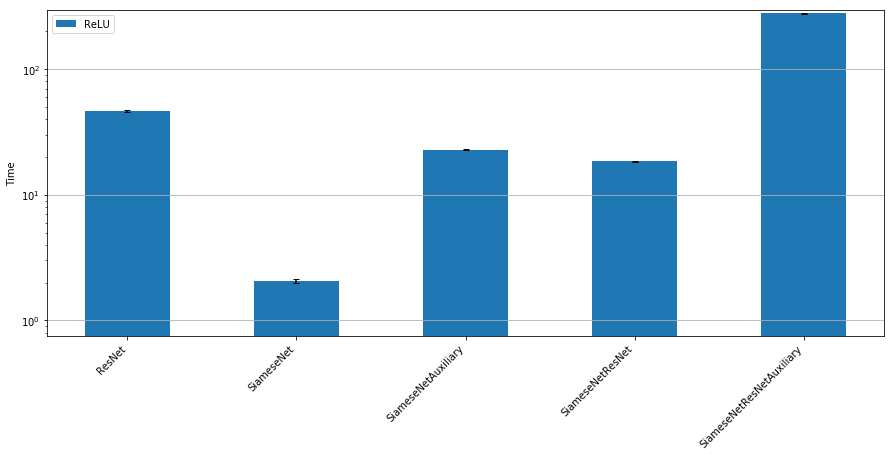

In [23]:
fig = plt.figure(figsize=(15,6))
# plt.title('Training Time (seconds)')
plt.grid(axis='y')

model_names = df.ModelName[:12]

# width of the bars
barWidth = 0.5
 
# Time bars
bars_relu = df.drop(index=range(7))[df.drop(index=range(7))['ActivFunc'] == 'ReLU']['meanTime_tr']
 
x_relu = pd.array(range(len(bars_relu)), dtype='float')

# Height of the error bars
yer_relu = df.drop(index=range(7))[df.drop(index=range(7))['ActivFunc'] == 'ReLU']['stdTime_tr']

transparent = (0, 0, 0, 0)
plt.bar(x_relu, bars_relu, width= barWidth, yerr=yer_relu, capsize=3, label='ReLU')

# general layout
bpttom, top = plt.ylim()
plt.yscale('log')
plt.ylim(0.75,top)
plt.xticks([r for r in range(len(bars_relu))], model_names[7:], rotation=45, ha = 'right')
plt.ylabel('Time')
# plt.xlim(left, right)
# plt.hlines(CV_per_class_results['Logistic Regression'].mean(), left, right, color='seagreen', linestyles='dashed', label='Best per-class accuracy')
# plt.hlines(CV_results['Logistic Regression'].mean(), left, right, color='steelblue', linestyles='dotted', label='Best overall accuracy')
plt.legend()


plt.savefig('BarPlotTime-slow-gpu.png', bbox_inches='tight', pad_inches=0.2)

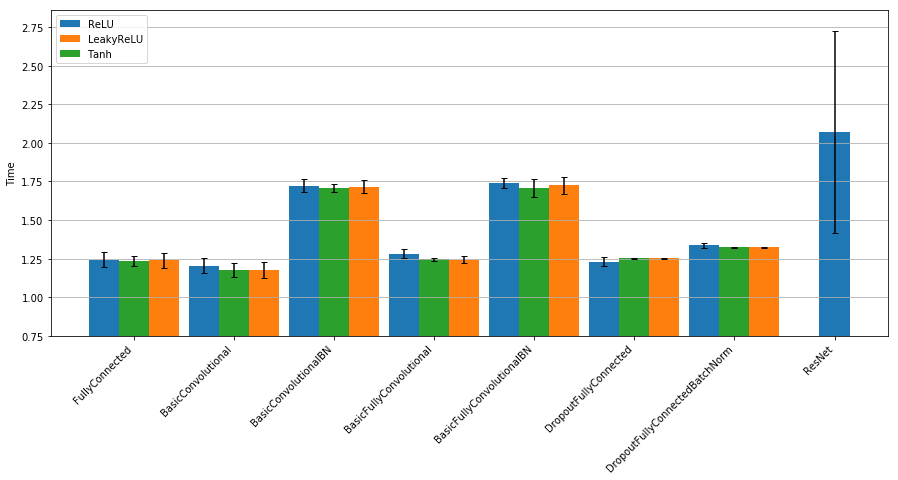

In [24]:
fig = plt.figure(figsize=(15,6))
# plt.title('Training Time (seconds)')
plt.grid(axis='y')

model_names = df.ModelName[:12]

# width of the bars
barWidth = 0.3
 
# Time bars
bars_relu = df.drop(index=[7,9,10,11])[df.drop(index=[7,9,10,11])['ActivFunc'] == 'ReLU']['meanTime_tr']
bars_tanh = df.meanTime_tr[df['ActivFunc'] == 'Tanh']
bars_Lrelu = df.meanTime_tr[df['ActivFunc'] == 'LeakyReLU']
 
x_relu = pd.array(range(12), dtype='float')
x_Lrelu = x_relu + 2*barWidth
x_tanh = x_relu + barWidth    

x_relu[-5:] += barWidth

# Height of the error bars
yer_relu = df.stdTime_tr[df['ActivFunc'] == 'ReLU']
yer_tanh = df.stdTime_tr[df['ActivFunc'] == 'Tanh']
yer_Lrelu = df.stdTime_tr[df['ActivFunc'] == 'LeakyReLU']

transparent = (0, 0, 0, 0)
plt.bar(x_relu[:len(bars_Lrelu)+1], bars_relu[:len(bars_Lrelu)+1], width= barWidth, yerr=yer_relu[:len(bars_Lrelu)+1], capsize=3, label='ReLU')
plt.bar(x_Lrelu[:len(bars_Lrelu)], bars_Lrelu, width = barWidth, yerr=yer_Lrelu, capsize=3, label='LeakyReLU')
plt.bar(x_tanh[:len(bars_tanh)], bars_tanh, width = barWidth, yerr=yer_tanh, capsize=3, label='Tanh')

# general layout
bpttom, top = plt.ylim()
plt.yscale('linear')
plt.ylim(0.75,top)
plt.xticks([r + barWidth for r in range(len(bars_Lrelu)+1)], model_names[:len(bars_Lrelu)+1], rotation=45, ha = 'right')
plt.ylabel('Time')
# plt.xlim(left, right)
# plt.hlines(CV_per_class_results['Logistic Regression'].mean(), left, right, color='seagreen', linestyles='dashed', label='Best per-class accuracy')
# plt.hlines(CV_results['Logistic Regression'].mean(), left, right, color='steelblue', linestyles='dotted', label='Best overall accuracy')
plt.legend()


plt.savefig('BarPlotTime-fast-gpu.png', bbox_inches='tight', pad_inches=0.2)